<a href="https://colab.research.google.com/github/masa-yo1/Reserch_tennis/blob/main/swing_vision_%E6%A9%9F%E6%A2%B0%E5%AD%A6%E7%BF%92_%E3%82%B5%E3%83%BC%E3%83%96%E3%81%A8%E3%83%AA%E3%82%BF%E3%83%BC%E3%83%B3%E5%90%AB%E3%82%81%E3%81%9F_%E5%BE%97%E7%82%B9%E3%81%A7%E3%81%8D%E3%82%8B%E5%8F%AF%E8%83%BD%E6%80%A7_%E3%83%AD%E3%82%B8%E3%82%B9%E3%83%86%E3%82%A3%E3%83%83%E3%82%AF%E5%9B%9E%E5%B8%B0_ipynb_%E3%81%AE%E3%82%B3%E3%83%94%E3%83%BC_%E3%81%AE%E3%82%B3%E3%83%94%E3%83%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/MyDrive/tennis_data/match_2023_01_10

/content/drive/MyDrive/tennis_data/match_2023_01_10


In [ ]:
df=pd.read_csv('vs_kubo_1.csv')
condition = df['Stroke'] == 'Feed'
subset = df[condition]
df = df.drop(subset.index)
len(df)

733

In [ ]:
def in_to_1_outnet_to_0(val):
    if val == 'In':
        return 1
    else:
        return 0

In [ ]:
df['Result'] = df['Result'].apply(in_to_1_outnet_to_0)
df['Bounce (y)'] = abs(df['Bounce (y)'] -11.885)   #深さをネットからの距離に
df['Hit (y)'] = abs(df['Hit (y)'] -11.885)

In [ ]:
#Shotが1に戻るまでを1ラリーとして、試合を通してのラリー数を書いた列を追加するコードを書いて下さい。
#ただし、Typeがsecond_serveの時だけは、ラリー数をそのままにして下さい
rally_count = 0
prev_shot = 1
rally_list = []
for index, row in df.iterrows():
    if row['Type'] != 'second_serve':
        if row['Shot'] == 1:
            rally_count += 1
        rally_list.append(rally_count)
        prev_shot = row['Shot']
    else:
        rally_list.append(rally_list[-1])

df['Rally'] = rally_list

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
# ラリー番号ごとにループを回す
for rally_num in range(1, df['Rally'].max() + 1):
    # ラリー番号が一致する行を抽出
    rally_df = df[df['Rally'] == rally_num]
    
    # ラリーの最後の行を抽出
    last_shot = rally_df.tail(1)
    
    # Point acquisitionを1にする条件に合致するかを判定
    if last_shot['Player'].values[0] == 'Yoshizawa Masatsugu' and last_shot['Result'].values[0] == 1:
        point_acquisition = 1
    elif last_shot['Player'].values[0] == '龍哉 久保' and last_shot['Result'].values[0] == 0:
        point_acquisition = 1
    else:
        point_acquisition = 0
    
    # ラリー全体に値をセット
    df.loc[df['Rally'] == rally_num, 'Point acquisition'] = point_acquisition


In [ ]:
#'Bounce (x)' 列と 'Bounce (y)' 一つずらしたdfを作成
df['Bounce (x)'] = df['Bounce (x)'].shift()
df['Bounce (y)'] = df['Bounce (y)'].shift()
#サーブとリターンの行は削除


In [ ]:
# Typeが"first_serve"または"second_serve"の場合、Bounce (x)とBounce (y)を0にする
mask = (df['Type'] == 'first_serve') | (df['Type'] == 'second_serve')
df.loc[mask, ['Bounce (x)', 'Bounce (y)']] = 0
df_kubo = df[df['Player'] =='龍哉 久保']
df_yoshizawa = df[df['Player'] == 'Yoshizawa Masatsugu']

In [ ]:
df_yoshizawa = df_yoshizawa.drop(['Player','Point','Game', 'Set', 'Hit Depth', 'Favorited', 'Start Time', 'Video Time','Bounce Depth', 'Bounce Zone', 'Bounce Side', 'Hit Zone', 'Hit Side' ,'Result'], axis=1)
df_kubo = df_kubo.drop(['Player','Point','Game', 'Set', 'Hit Depth', 'Favorited', 'Start Time', 'Video Time','Bounce Depth', 'Bounce Zone', 'Bounce Side', 'Hit Zone', 'Hit Side' ,'Result'], axis=1)

In [ ]:
import warnings
# 警告文を非表示
warnings.simplefilter('ignore')

from sklearn.preprocessing import LabelEncoder

# ラベルエンコーディングを行うために、LabelEncoderクラスをインスタンス化（利用するためのおまじないだとお考えください）
enc = LabelEncoder() # encはencoderの省略名称である変数です。
# fit()によりTypeカラムに対してラベルエンコーディングを行います。
label_encoder = enc.fit(df_yoshizawa[["Type"]])

# カラムの要素を取得
# transform()で数値へ変換
integer_classes = label_encoder.transform(label_encoder.classes_)
#print('Integer classes:',integer_classes)

df_yoshizawa["Type"] = label_encoder.transform(df_yoshizawa[["Type"]])

#print(df_yoshizawa[["Type"]]) #'first_serve' 'in_play' 'none' 'return' 'return_plus_one' 'second_serve''serve' 'serve_plus_one'] [0 1 2 3 4 5 6 7] に

#Stroke

label_encoder = enc.fit(df_yoshizawa[["Stroke"]])

# カラムの要素を取得
integer_classes = label_encoder.transform(label_encoder.classes_)

df_yoshizawa["Stroke"] = label_encoder.transform(df_yoshizawa[["Stroke"]])

#Spin Categorical classes: ['Flat' 'Kick' 'Slice' 'Topspin'] Integer classes: [0 1 2 3]

label_encoder = enc.fit(df_yoshizawa[["Spin"]])
integer_classes = label_encoder.transform(label_encoder.classes_)
df_yoshizawa["Spin"] = label_encoder.transform(df_yoshizawa[["Spin"]])

#Direction Categorical classes: ['---' 'cross court' 'down the T' 'down the line' 'inside in' 'inside out''out wide']Integer classes: [0 1 2 3 4 5 6]
label_encoder = enc.fit(df_yoshizawa[["Direction"]])
integer_classes = label_encoder.transform(label_encoder.classes_)
df_yoshizawa["Direction"] = label_encoder.transform(df_yoshizawa[["Direction"]])

In [ ]:
import warnings
# 警告文を非表示
warnings.simplefilter('ignore')

from sklearn.preprocessing import LabelEncoder

# ラベルエンコーディングを行うために、LabelEncoderクラスをインスタンス化（利用するためのおまじないだとお考えください）
enc = LabelEncoder() # encはencoderの省略名称である変数です。
# fit()によりTypeカラムに対してラベルエンコーディングを行います。
label_encoder = enc.fit(df_kubo[["Type"]])

# カラムの要素を取得
# transform()で数値へ変換
integer_classes = label_encoder.transform(label_encoder.classes_)
#print('Integer classes:',integer_classes)

df_kubo["Type"] = label_encoder.transform(df_kubo[["Type"]])

#print(df_kubo[["Type"]]) #'first_serve' 'in_play' 'none' 'return' 'return_plus_one' 'second_serve''serve' 'serve_plus_one'] [0 1 2 3 4 5 6 7] に

#Stroke

label_encoder = enc.fit(df_kubo[["Stroke"]])

# カラムの要素を取得
integer_classes = label_encoder.transform(label_encoder.classes_)

df_kubo["Stroke"] = label_encoder.transform(df_kubo[["Stroke"]])

#Spin Categorical classes: ['Flat' 'Kick' 'Slice' 'Topspin'] Integer classes: [0 1 2 3]

label_encoder = enc.fit(df_kubo[["Spin"]])
integer_classes = label_encoder.transform(label_encoder.classes_)
df_kubo["Spin"] = label_encoder.transform(df_kubo[["Spin"]])

#Direction Categorical classes: ['---' 'cross court' 'down the T' 'down the line' 'inside in' 'inside out''out wide']Integer classes: [0 1 2 3 4 5 6]
label_encoder = enc.fit(df_kubo[["Direction"]])
integer_classes = label_encoder.transform(label_encoder.classes_)
df_kubo["Direction"] = label_encoder.transform(df_kubo[["Direction"]])

Shot : 0.0981870201390019
Type : -0.06588254461977369
Stroke : -0.05830853640229689
Spin : 0.08500286982948543
Speed (KM/H) : -0.006695801165449613
Bounce (x) : -0.2147874208921645
Bounce (y) : -0.016176252448502775
Hit (x) : 0.14941920513143783
Hit (y) : 0.025470080203468574
Hit (z) : 0.21185876887571092
Direction : -0.053441513458464054
Rally : 0.0030275298566274965
Accuracy: 1.0


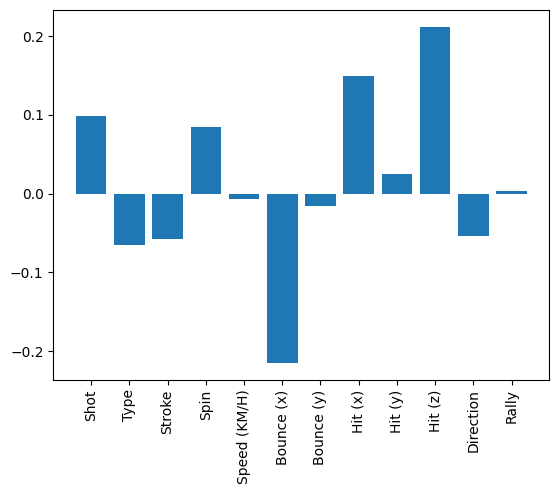

In [ ]:
# 必要なライブラリをインポートする
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


data = df_yoshizawa

# 特徴量と目的変数を分ける
X = data.drop('Point acquisition', axis=1)
y = data['Point acquisition']

# 訓練用データとテスト用データに分割する
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1, random_state=12)

# モデルを訓練する
model = LogisticRegression()
model.fit(X_train, y_train)


# 各特徴量の重みを取得
weights = model.coef_[0]

# 各特徴量の重要度を表示
for i in range(len(X.columns)):
    print(X.columns[i], ':', weights[i])


# テスト用データを用いてモデルの精度を評価する
y_pred = model.predict(X_test)
# モデルの評価
score = model.score(X_test, y_test)
print('Accuracy:', score)

# 特徴量の重要度をグラフに描画
plt.bar(X.columns, weights)
plt.xticks(rotation=90)
plt.show()


In [ ]:
# データのクラスの確率を予測する
y_proba = model.predict_proba(X)

# データ対する予測確率を出力する
for i in range(len(y)):
    print(f"Sample {i}: Class 0: {y_proba[i][0]}, Class 1: {y_proba[i][1]}")

Sample 0: Class 0: 0.5037923258449162, Class 1: 0.4962076741550838
Sample 1: Class 0: 0.49204144487419166, Class 1: 0.5079585551258083
Sample 2: Class 0: 0.3771366701690345, Class 1: 0.6228633298309655
Sample 3: Class 0: 0.3914314068080966, Class 1: 0.6085685931919034
Sample 4: Class 0: 0.5625845222298576, Class 1: 0.43741547777014245
Sample 5: Class 0: 0.5434608536573138, Class 1: 0.4565391463426863
Sample 6: Class 0: 0.5246223942348622, Class 1: 0.47537760576513777
Sample 7: Class 0: 0.6327855431896569, Class 1: 0.36721445681034315
Sample 8: Class 0: 0.5285432310462232, Class 1: 0.4714567689537768
Sample 9: Class 0: 0.4641968292843598, Class 1: 0.5358031707156402
Sample 10: Class 0: 0.41331065157305336, Class 1: 0.5866893484269466
Sample 11: Class 0: 0.39131266388697683, Class 1: 0.6086873361130232
Sample 12: Class 0: 0.5766537172753022, Class 1: 0.42334628272469776
Sample 13: Class 0: 0.44920069999403867, Class 1: 0.5507993000059613
Sample 14: Class 0: 0.4220314347005337, Class 1: 0

In [ ]:
df_yoshizawa_classifier_confidence = df_yoshizawa.copy()
new_col_name = "Point acquisition rate"
# テスト用データのクラスの確率を予測する
y_proba = model.predict_proba(X)
# 新しい列をデータフレームに追加する
df_yoshizawa_classifier_confidence[new_col_name] = y_proba[:, 1]
df_yoshizawa_classifier_confidence.head()

,Shot,Type,Stroke,Spin,Speed (KM/H),Bounce (x),Bounce (y),Hit (x),Hit (y),Hit (z),Direction,Rally,Point acquisition,Point acquisition rate
1,2,3,1,3,67.991951,1.540818,4.327014,2.866704,12.576038,1.140431,4,1,1.0,0.496208
3,4,4,1,3,74.643082,-1.712300,7.789904,-2.544409,12.938649,0.938888,1,1,1.0,0.507959
5,6,1,1,3,72.283096,-0.719358,7.536090,-1.248331,13.851430,1.185831,1,1,1.0,0.622863
7,9,1,1,3,78.857880,1.486005,6.165491,1.727386,8.694775,1.127259,4,1,1.0,0.608569
11,2,3,3,3,69.152916,-1.410573,4.388790,-1.772645,10.835678,1.343061,5,2,1.0,0.437415


In [ ]:
import matplotlib.pyplot as plt

def plot_rally(df, rally):
    rally_df = df[df['Rally'] == rally]
    x = rally_df['Shot']
    y = rally_df['Point acquisition rate']
    plt.plot(x, y)
    plt.xlabel('Shot')
    plt.ylabel('Point acquisition rate')
    plt.title('Rally {}'.format(rally))
    plt.show()


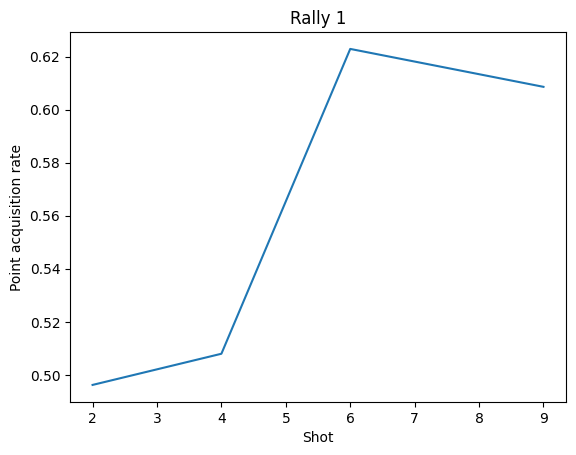

In [ ]:
plot_rally(df_yoshizawa_classifier_confidence,  1)

Shot : 0.17873239201300747
Type : -0.02363580872329729
Stroke : -0.09879158700779914
Spin : -0.04587517316398728
Speed (KM/H) : -0.009199459685616427
Bounce (x) : -0.08761793345014993
Bounce (y) : -0.02619142288563934
Hit (x) : 0.08270069442055676
Hit (y) : 0.06438910130937127
Hit (z) : 0.31272072052088434
Direction : -0.040536113561203006
Rally : 0.0007686726150557652
Accuracy: 1.0


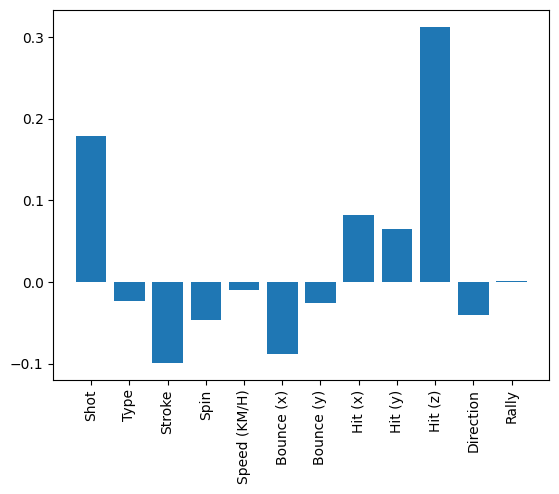

In [ ]:
#久保の方
# 必要なライブラリをインポートする
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

data = df_kubo

# 特徴量と目的変数を分ける
X = data.drop('Point acquisition', axis=1)
y = data['Point acquisition']

# 訓練用データとテスト用データに分割する
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1, random_state=12)

# モデルを訓練する
model_k = LogisticRegression()
model_k.fit(X_train, y_train)

# 各特徴量の重みを取得
weights = model_k.coef_[0]

# 各特徴量の重要度を表示
for i in range(len(X.columns)):
    print(X.columns[i], ':', weights[i])

# モデルの評価
score = model.score(X_test, y_test)
print('Accuracy:', score)

# テスト用データを用いてモデルの精度を評価する
y_pred = model_k.predict(X_test)

# 特徴量の重要度をグラフに描画
plt.bar(X.columns, weights)
plt.xticks(rotation=90)
plt.show()


In [ ]:
# テスト用データのクラスの確率を予測する
y_proba = model_k.predict_proba(X)

# テスト用データの各サンプルに対する予測確率を出力する
for i in range(len(y)):
    print(f"Sample {i}: Class 0: {y_proba[i][0]}, Class 1: {y_proba[i][1]}")

Sample 0: Class 0: 0.49823909965028446, Class 1: 0.5017609003497155
Sample 1: Class 0: 0.5762999200132335, Class 1: 0.42370007998676645
Sample 2: Class 0: 0.4302119353368852, Class 1: 0.5697880646631148
Sample 3: Class 0: 0.2891336312294809, Class 1: 0.7108663687705191
Sample 4: Class 0: 0.1920997104556672, Class 1: 0.8079002895443328
Sample 5: Class 0: 0.49941642853551305, Class 1: 0.500583571464487
Sample 6: Class 0: 0.5147397675166423, Class 1: 0.48526023248335765
Sample 7: Class 0: 0.4318700990767027, Class 1: 0.5681299009232973
Sample 8: Class 0: 0.5904817392601261, Class 1: 0.40951826073987385
Sample 9: Class 0: 0.5984494871778683, Class 1: 0.4015505128221317
Sample 10: Class 0: 0.4990930815564967, Class 1: 0.5009069184435033
Sample 11: Class 0: 0.511884470234593, Class 1: 0.488115529765407
Sample 12: Class 0: 0.5013208284736294, Class 1: 0.49867917152637065
Sample 13: Class 0: 0.49502528434218296, Class 1: 0.504974715657817
Sample 14: Class 0: 0.28818061148203655, Class 1: 0.711

In [ ]:
#久保の方はclass0が得点する確率

df_kubo_classifier_confidence = df_kubo.copy()
new_col_name = "Point acquisition rate"
# テスト用データのクラスの確率を予測する
y_proba = model_k.predict_proba(X)
# 新しい列をデータフレームに追加する
df_kubo_classifier_confidence[new_col_name] = y_proba[:, 0]
df_kubo_classifier_confidence.head()

,Shot,Type,Stroke,Spin,Speed (KM/H),Bounce (x),Bounce (y),Hit (x),Hit (y),Hit (z),Direction,Rally,Point acquisition,Point acquisition rate
0,1,0,5,0,98.436745,0.000000,0.000000,-0.784507,11.792910,2.704495,2,1,1.0,0.498239
2,3,7,3,3,91.792122,0.641170,9.733553,0.378104,14.079935,1.302506,5,1,1.0,0.576300
4,5,1,3,3,88.915466,1.157406,8.686537,1.816429,14.363003,1.121761,5,1,1.0,0.430212
6,7,1,3,3,44.372288,0.429961,4.240902,1.238550,10.230923,0.944325,4,1,1.0,0.289134
8,10,1,1,0,81.016518,1.950220,8.712015,1.939592,12.365864,0.998229,3,1,1.0,0.192100


In [ ]:
#df_last_yoshizawa = df[df['Player'] == 'Yoshizawa Masatsugu']
#df_last_yoshizawa.head()

## 新データで予測

In [ ]:
df_new = pd.read_csv('match_2023_12_23.csv')
condition = df_new['Stroke'] == 'Feed'
subset = df_new[condition]
df_new = df_new.drop(subset.index)
df_new['Result'] = df_new['Result'].apply(in_to_1_outnet_to_0)
df_new['Bounce (y)'] = abs(df_new['Bounce (y)'] -11.885)   #深さをネットからの距離に
df_new['Hit (y)'] = abs(df_new['Hit (y)'] -11.885)

In [ ]:
#Shotが1に戻るまでを1ラリーとして、試合を通してのラリー数を書いた列を追加するコードを書いて下さい。
#ただし、Typeがsecond_serveの時だけは、ラリー数をそのままにして下さい
rally_count = 0
prev_shot = 1
rally_list = []
for index, row in df_new.iterrows():
    if row['Type'] != 'second_serve':
        if row['Shot'] == 1:
            rally_count += 1
        rally_list.append(rally_count)
        prev_shot = row['Shot']
    else:
        rally_list.append(rally_list[-1])

df_new['Rally'] = rally_list

In [ ]:
# ラリー番号ごとにループを回す
for rally_num in range(1, df_new['Rally'].max() + 1):
    # ラリー番号が一致する行を抽出
    rally_df = df_new[df_new['Rally'] == rally_num]
    
    # ラリーの最後の行を抽出
    last_shot = rally_df.tail(1)
    
    # Point acquisitionを1にする条件に合致するかを判定
    if last_shot['Player'].values[0] == 'Yoshizawa Masatsugu' and last_shot['Result'].values[0] == 1:
        point_acquisition = 1
    elif last_shot['Player'].values[0] == '龍哉 久保' and last_shot['Result'].values[0] == 0:
        point_acquisition = 1
    else:
        point_acquisition = 0
    
    # ラリー全体に値をセット
    df_new.loc[df_new['Rally'] == rally_num, 'Point acquisition'] = point_acquisition


In [ ]:
df_new['Bounce (x)'] = df_new['Bounce (x)'].shift()
df_new['Bounce (y)'] = df_new['Bounce (y)'].shift()
#サーブとリターンを除外
df_new['Result'] = df_new['Result'].apply(in_to_1_outnet_to_0)

# Typeが"first_serve"または"second_serve"の場合、Bounce (x)とBounce (y)を0にする
mask = (df_new['Type'] == 'first_serve') | (df_new['Type'] == 'second_serve')
df_new.loc[mask, ['Bounce (x)', 'Bounce (y)']] = 0

df_new_kubo = df_new[df_new['Player'] =='龍哉 久保']
df_new_yoshizawa = df_new[df_new['Player'] == 'Yoshizawa Masatsugu']

In [ ]:
df_new_yoshizawa = df_new_yoshizawa.drop(['Player','Point','Game', 'Set', 'Hit Depth', 'Favorited', 'Start Time', 'Video Time','Bounce Depth', 'Bounce Zone', 'Bounce Side', 'Hit Zone', 'Hit Side', 'Result'], axis=1)
df_new_kubo = df_new_kubo.drop(['Player','Point','Game', 'Set', 'Hit Depth', 'Favorited', 'Start Time', 'Video Time','Bounce Depth', 'Bounce Zone', 'Bounce Side', 'Hit Zone', 'Hit Side', 'Result'], axis=1)

In [ ]:
enc = LabelEncoder() # encはencoderの省略名称である変数です。
# fit()によりTypeカラムに対してラベルエンコーディングを行います。
label_encoder = enc.fit(df_new_yoshizawa[["Type"]])
integer_classes = label_encoder.transform(label_encoder.classes_)
df_new_yoshizawa["Type"] = label_encoder.transform(df_new_yoshizawa[["Type"]])

#Stroke

label_encoder = enc.fit(df_new_yoshizawa[["Stroke"]])
integer_classes = label_encoder.transform(label_encoder.classes_)
df_new_yoshizawa["Stroke"] = label_encoder.transform(df_new_yoshizawa[["Stroke"]])

#Spin Categorical classes: ['Flat' 'Kick' 'Slice' 'Topspin'] Integer classes: [0 1 2 3]
label_encoder = enc.fit(df_new_yoshizawa[["Spin"]])
integer_classes = label_encoder.transform(label_encoder.classes_)
df_new_yoshizawa["Spin"] = label_encoder.transform(df_new_yoshizawa[["Spin"]])

#Direction Categorical classes: ['---' 'cross court' 'down the T' 'down the line' 'inside in' 'inside out''out wide']Integer classes: [0 1 2 3 4 5 6]
label_encoder = enc.fit(df_new_yoshizawa[["Direction"]])
integer_classes = label_encoder.transform(label_encoder.classes_)
df_new_yoshizawa["Direction"] = label_encoder.transform(df_new_yoshizawa[["Direction"]])


In [ ]:
enc = LabelEncoder() # encはencoderの省略名称である変数です。
# fit()によりTypeカラムに対してラベルエンコーディングを行います。
label_encoder = enc.fit(df_new_kubo[["Type"]])
integer_classes = label_encoder.transform(label_encoder.classes_)
df_new_kubo["Type"] = label_encoder.transform(df_new_kubo[["Type"]])

#Stroke

label_encoder = enc.fit(df_new_kubo[["Stroke"]])
integer_classes = label_encoder.transform(label_encoder.classes_)
df_new_kubo["Stroke"] = label_encoder.transform(df_new_kubo[["Stroke"]])

#Spin Categorical classes: ['Flat' 'Kick' 'Slice' 'Topspin'] Integer classes: [0 1 2 3]
label_encoder = enc.fit(df_new_kubo[["Spin"]])
integer_classes = label_encoder.transform(label_encoder.classes_)
df_new_kubo["Spin"] = label_encoder.transform(df_new_kubo[["Spin"]])

#Direction Categorical classes: ['---' 'cross court' 'down the T' 'down the line' 'inside in' 'inside out''out wide']Integer classes: [0 1 2 3 4 5 6]
label_encoder = enc.fit(df_new_kubo[["Direction"]])
integer_classes = label_encoder.transform(label_encoder.classes_)
df_new_kubo["Direction"] = label_encoder.transform(df_new_kubo[["Direction"]])

In [ ]:
df_new_yoshizawa_1 = df_new_yoshizawa.drop(['Point acquisition'], axis =1)
df_new_kubo_1 = df_new_kubo.drop(['Point acquisition'], axis =1)
df_new_yoshizawa_1.head()

,Shot,Type,Stroke,Spin,Speed (KM/H),Bounce (x),Bounce (y),Hit (x),Hit (y),Hit (z),Direction,Rally
2,2,2,3,3,64.693878,-1.049904,3.974868,-1.525902,12.966954,1.225178,0,1
4,4,3,3,2,61.960609,-1.390404,3.571020,-2.269601,10.074612,1.133872,0,1
6,6,1,1,3,59.128944,1.601858,10.498333,2.037655,12.966954,0.892581,2,1
8,8,1,1,3,66.406624,1.753331,6.068365,1.721740,12.007624,0.892581,0,1
11,2,2,1,3,67.209190,2.353571,4.850056,2.859036,12.159912,1.331611,0,2


In [ ]:
# テスト用データのクラスの確率を予測する
y_proba = model.predict_proba(df_new_yoshizawa_1)
y = df_new_yoshizawa['Point acquisition']

# テスト用データの各サンプルに対する予測確率を出力する
for i in range(len(y)):
    print(f"Sample {i}: Class 0: {y_proba[i][0]}, Class 1: {y_proba[i][1]}")

Sample 0: Class 0: 0.47410632774600325, Class 1: 0.5258936722539967
Sample 1: Class 0: 0.48925408638757617, Class 1: 0.5107459136124238
Sample 2: Class 0: 0.4022247776491288, Class 1: 0.5977752223508712
Sample 3: Class 0: 0.3501866898489264, Class 1: 0.6498133101510736
Sample 4: Class 0: 0.470415493472243, Class 1: 0.529584506527757
Sample 5: Class 0: 0.5032655328873259, Class 1: 0.49673446711267416
Sample 6: Class 0: 0.5005326940333643, Class 1: 0.49946730596663574
Sample 7: Class 0: 0.48185729814297584, Class 1: 0.5181427018570242
Sample 8: Class 0: 0.42658131358505325, Class 1: 0.5734186864149468
Sample 9: Class 0: 0.49652053488093895, Class 1: 0.503479465119061
Sample 10: Class 0: 0.5490540993499173, Class 1: 0.45094590065008266
Sample 11: Class 0: 0.5642681916376668, Class 1: 0.43573180836233316
Sample 12: Class 0: 0.6140225847701866, Class 1: 0.38597741522981344
Sample 13: Class 0: 0.6295490075016743, Class 1: 0.37045099249832575
Sample 14: Class 0: 0.5099760913343334, Class 1: 0

In [ ]:
df_new_yoshizawa_classifier_confidence = df_new_yoshizawa.copy()
new_col_name = "Point acquisition rate"
# テスト用データのクラスの確率を予測する
y_proba = model.predict_proba(df_new_yoshizawa_1)
# 新しい列をデータフレームに追加する
df_new_yoshizawa_classifier_confidence[new_col_name] = y_proba[:, 1]

In [ ]:
# テスト用データのクラスの確率を予測する
y_proba = model_k.predict_proba(df_new_kubo_1)
y = df_new_kubo['Point acquisition']

# テスト用データの各サンプルに対する予測確率を出力する
for i in range(len(y)):
    print(f"Sample {i}: Class 0: {y_proba[i][0]}, Class 1: {y_proba[i][1]}")

Sample 0: Class 0: 0.3664102822013363, Class 1: 0.6335897177986637
Sample 1: Class 0: 0.47582463401471053, Class 1: 0.5241753659852895
Sample 2: Class 0: 0.4830831295923521, Class 1: 0.5169168704076479
Sample 3: Class 0: 0.45713004506197996, Class 1: 0.54286995493802
Sample 4: Class 0: 0.34564605410703575, Class 1: 0.6543539458929643
Sample 5: Class 0: 0.23957008398099955, Class 1: 0.7604299160190005
Sample 6: Class 0: 0.5536200213238374, Class 1: 0.4463799786761626
Sample 7: Class 0: 0.5941549642351507, Class 1: 0.4058450357648493
Sample 8: Class 0: 0.4470220389134716, Class 1: 0.5529779610865284
Sample 9: Class 0: 0.4867116272112758, Class 1: 0.5132883727887242
Sample 10: Class 0: 0.4039035244876765, Class 1: 0.5960964755123235
Sample 11: Class 0: 0.35318066468914644, Class 1: 0.6468193353108536
Sample 12: Class 0: 0.5386509398805092, Class 1: 0.46134906011949084
Sample 13: Class 0: 0.49979451192952096, Class 1: 0.500205488070479
Sample 14: Class 0: 0.3123866931804923, Class 1: 0.687

In [ ]:
#久保の方はclass0が得点確率
df_new_kubo_classifier_confidence = df_new_kubo.copy()
new_col_name = "Point acquisition rate"
# テスト用データのクラスの確率を予測する
y_proba = model_k.predict_proba(df_new_kubo_1)
# 新しい列をデータフレームに追加する
df_new_kubo_classifier_confidence[new_col_name] = y_proba[:, 0]

In [ ]:
df_new_yoshizawa_classifier_confidence.head(15)

,Shot,Type,Stroke,Spin,Speed (KM/H),Bounce (x),Bounce (y),Hit (x),Hit (y),Hit (z),Direction,Rally,Point acquisition,Point acquisition rate
2,2,2,3,3,64.693878,-1.049904,3.974868,-1.525902,12.966954,1.225178,0,1,1.0,0.525894
4,4,3,3,2,61.960609,-1.390404,3.571020,-2.269601,10.074612,1.133872,0,1,1.0,0.510746
6,6,1,1,3,59.128944,1.601858,10.498333,2.037655,12.966954,0.892581,2,1,1.0,0.597775
8,8,1,1,3,66.406624,1.753331,6.068365,1.721740,12.007624,0.892581,0,1,1.0,0.649813
11,2,2,1,3,67.209190,2.353571,4.850056,2.859036,12.159912,1.331611,0,2,1.0,0.529585
15,2,2,3,3,81.926178,-1.942881,5.721813,-1.840279,13.370955,1.095965,2,3,1.0,0.496734
17,4,3,1,3,75.368713,2.511528,10.078634,2.922219,12.261439,0.892581,0,3,1.0,0.499467
20,2,2,1,3,75.111740,2.369423,5.772841,3.401839,12.196266,1.035593,0,4,1.0,0.518143
22,4,3,1,3,85.846512,1.141296,6.935366,2.466373,11.565958,1.391710,0,4,1.0,0.573419
24,1,0,4,0,89.250656,0.000000,0.000000,0.458078,12.049423,2.565132,1,5,1.0,0.503479


In [ ]:
df_new_kubo_classifier_confidence.tail()

,Shot,Type,Stroke,Spin,Speed (KM/H),Bounce (x),Bounce (y),Hit (x),Hit (y),Hit (z),Direction,Rally,Point acquisition,Point acquisition rate
250,1,0,4,0,93.355141,0.000000,0.000000,-0.587265,12.155513,2.579157,5,52,1.0,0.482347
252,3,6,3,3,64.095451,-2.134717,9.871183,-2.677826,13.426672,1.062944,4,52,1.0,0.519871
253,1,0,4,0,81.964340,0.000000,0.000000,0.470560,12.020435,2.541984,1,53,1.0,0.399991
255,3,6,3,3,55.308556,0.399788,7.854863,0.824710,13.404860,0.908042,0,53,1.0,0.441573
257,5,1,1,2,59.599545,-2.436444,7.028461,-3.100243,11.800173,1.138919,0,53,1.0,0.303891


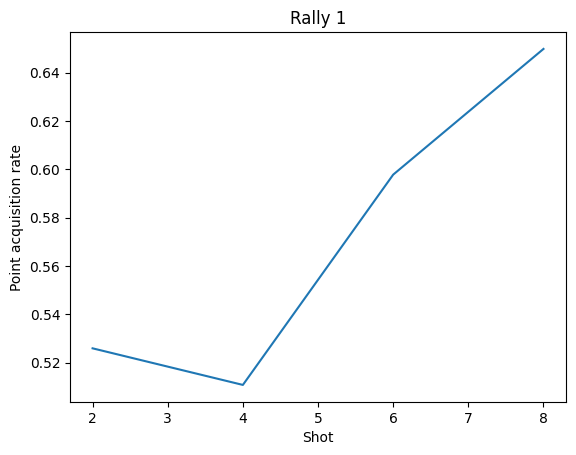

In [ ]:
plot_rally(df_new_yoshizawa_classifier_confidence,  1)

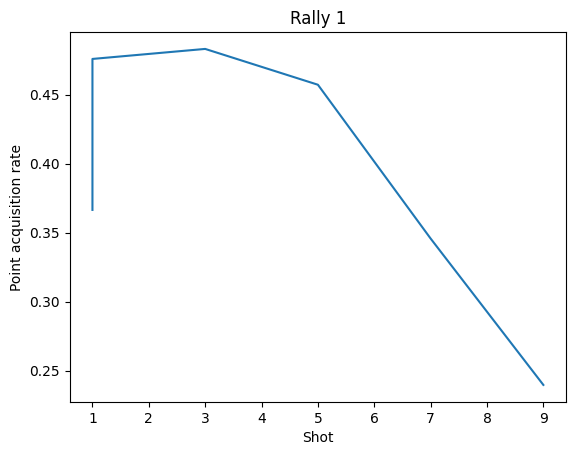

In [ ]:
plot_rally(df_new_kubo_classifier_confidence,  1)

In [ ]:
import matplotlib.pyplot as plt

def plot_rally_1(df_yoshizawa, df_kubo, rally_num):
    # Yoshizawaのデータを抽出
    yoshizawa_df = df_yoshizawa[df_yoshizawa['Rally'] == rally_num]
    
    # Kuboのデータを抽出
    kubo_df = df_kubo[df_kubo['Rally'] == rally_num]
    
    # 折れ線グラフを描画
    plt.plot(yoshizawa_df['Shot'], yoshizawa_df['Point acquisition rate'], label='Yoshizawa')
    plt.plot(kubo_df['Shot'], kubo_df['Point acquisition rate'], label='Kubo')
    
    # グラフの設定
    plt.title(f'Rally {rally_num}')
    plt.xlabel('Shot')
    plt.ylabel('Point acquisition rate')
    plt.legend()
    plt.show()


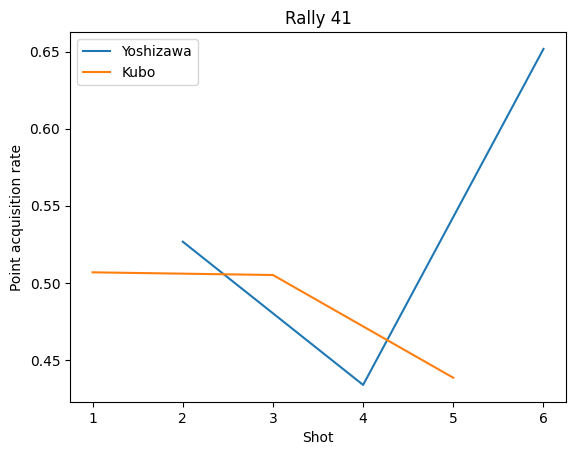

In [ ]:
plot_rally_1(df_new_yoshizawa_classifier_confidence, df_new_kubo_classifier_confidence, 41)  #41


In [ ]:
a = df_new_yoshizawa_classifier_confidence[df_new_yoshizawa_classifier_confidence['Rally'] == 41]
b = df_new_kubo_classifier_confidence[df_new_kubo_classifier_confidence['Rally'] == 41]
print(a)

     Shot  Type  Stroke  Spin  Speed (KM/H)  Bounce (x)  Bounce (y)   Hit (x)  \
188     2     2       1     2     56.589264    1.319734    5.607100  2.421358   
190     4     3       3     2     94.359818    1.516177    8.449822  1.370934   
192     6     1       3     2     47.869961    3.085157    5.353285  5.317936   

       Hit (y)   Hit (z)  Direction  Rally  Point acquisition  \
188  12.345332  1.090521          4     41                0.0   
190  12.058270  1.143375          2     41                0.0   
192  12.916956  0.808526          2     41                0.0   

     Point acquisition rate  
188                0.526711  
190                0.433780  
192                0.651755  


In [ ]:
print(b)

     Shot  Type  Stroke  Spin  Speed (KM/H)  Bounce (x)  Bounce (y)   Hit (x)  \
187     1     0       4     0    108.311943    0.000000    0.000000 -0.322668   
189     3     6       3     3     80.813446   -0.535565    7.694567 -0.475220   
191     5     1       3     3     85.829308    0.685987    9.571005  0.429961   

       Hit (y)   Hit (z)  Direction  Rally  Point acquisition  \
187  11.449232  2.289935          1     41                0.0   
189  12.109150  1.207071          0     41                0.0   
191  11.804573  1.401943          3     41                0.0   

     Point acquisition rate  
187                0.506826  
189                0.505086  
191                0.438425  


In [ ]:
1- 0.582513

0.41748700000000005

In [ ]:
a = [[2,0.446371],[3, 0.44856], [4,0.485343], [5,0.52121 ],[6,0.582513]]
b= [[2,0.5553629],[3, 0.551439], [4,0.51465], [5,0.478790],[6,0.417487]]

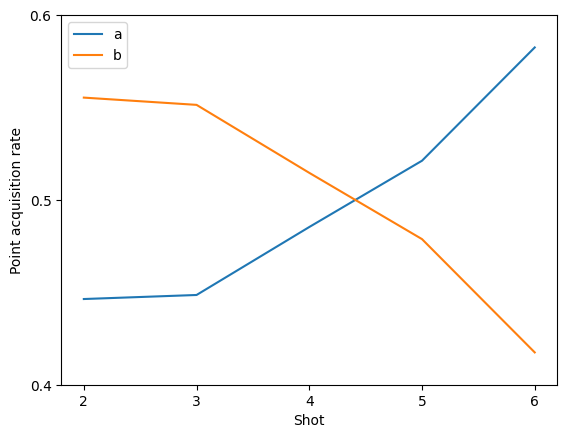

In [ ]:
import matplotlib.pyplot as plt

a_x = [i[0] for i in a]
a_y = [i[1] for i in a]

b_x = [i[0] for i in b]
b_y = [i[1] for i in b]

plt.plot(a_x, a_y, label='a')
plt.plot(b_x, b_y, label='b')

plt.xlabel('Shot')
plt.ylabel('Point acquisition rate')
plt.xticks([2, 3, 4, 5, 6])
plt.yticks([0.4, 0.5, 0.6])
plt.legend()

plt.show()